# Tarea 4: Error de sesgo y varianza

## Preparación y vizualizacipon de los datos

In [29]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt

ilpd_indian_liver_patient_dataset = fetch_ucirepo(id=225)


X = ilpd_indian_liver_patient_dataset.data.features 
y = ilpd_indian_liver_patient_dataset.data.targets

ilpd_indian_liver_patient_dataset.variables

,name,role,type,demographic,description,units,missing_values
0,Age,Feature,Integer,Age,Age of the patient. Any patient whose age exce...,years,no
1,Gender,Feature,Binary,Gender,Gender of the patient,None,no
2,TB,Feature,Continuous,None,Total Bilirubin,None,no
3,DB,Feature,Continuous,None,Direct Bilirubin,None,no
4,Alkphos,Feature,Integer,None,Alkaline Phosphotase,None,no
5,Sgpt,Feature,Integer,None,Alamine Aminotransferase,None,no
6,Sgot,Feature,Integer,None,Aspartate Aminotransferase,None,no
7,TP,Feature,Continuous,None,Total Proteins,None,no
8,ALB,Feature,Continuous,None,Albumin,None,no
9,A/G Ratio,Feature,Continuous,None,Albumin and Globulin Ratio,None,no


In [6]:
ilpd_indian_liver_patient_dataset.variables['description'][0]

'Age of the patient. Any patient whose age exceeded 89 is listed as being of age "90".'

In [9]:
ilpd_indian_liver_patient_dataset.variables['description'][10]

'Selector field used to split the data into two sets (labeled by the experts)'

In [24]:
ilpd_indian_liver_patient_dataset.data.original

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [45]:
X['Age']

0      65
1      62
2      62
3      58
4      72
       ..
578    60
579    40
580    52
581    31
582    38
Name: Age, Length: 583, dtype: int64

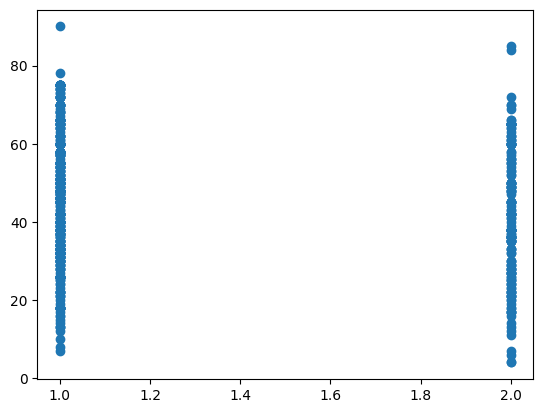

In [47]:
plt.scatter(y, X['Age'])